# Exoplanet Classification

## Background
I have decided to use a dataset available from Kaggle which is data collected by NASA on Exoplanets, with the idea being to identify potential stars with exoplanets using the Flux data. 

## Imports

In [1]:
# For numeric and data needs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For machine learning needs
# For loading digits dataset
from sklearn import datasets

# For scaling
from sklearn.preprocessing import StandardScaler

# For pipeline creation
from sklearn.pipeline import make_pipeline

# For Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FastICA
from sklearn.decomposition import SparsePCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# for classification
from sklearn.svm import SVC

# For machine learning model
from sklearn.neighbors import KNeighborsClassifier

# For model selection
from sklearn.model_selection import train_test_split

# For model metrics
from sklearn.metrics import f1_score

# For plotting needs
%matplotlib inline
import matplotlib.pyplot as plt

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Seaborn
import seaborn as sns

# For class imbalance
from imblearn.over_sampling import SMOTE

## Load the Data

In [2]:
# Import Train data and test data
file_path = r'C:\Users\S1013521\OneDrive - Syngenta\Desktop\Week Six - Project\data'
exo_train = 'exoTrain.csv'
exo_test = 'exoTest.csv'

df_train = pd.read_csv(file_path + '\\' + exo_train)
df_test = pd.read_csv(file_path + '\\' + exo_test)
df_train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


## EDA

In [3]:
df_train.isna().sum().sum()

0

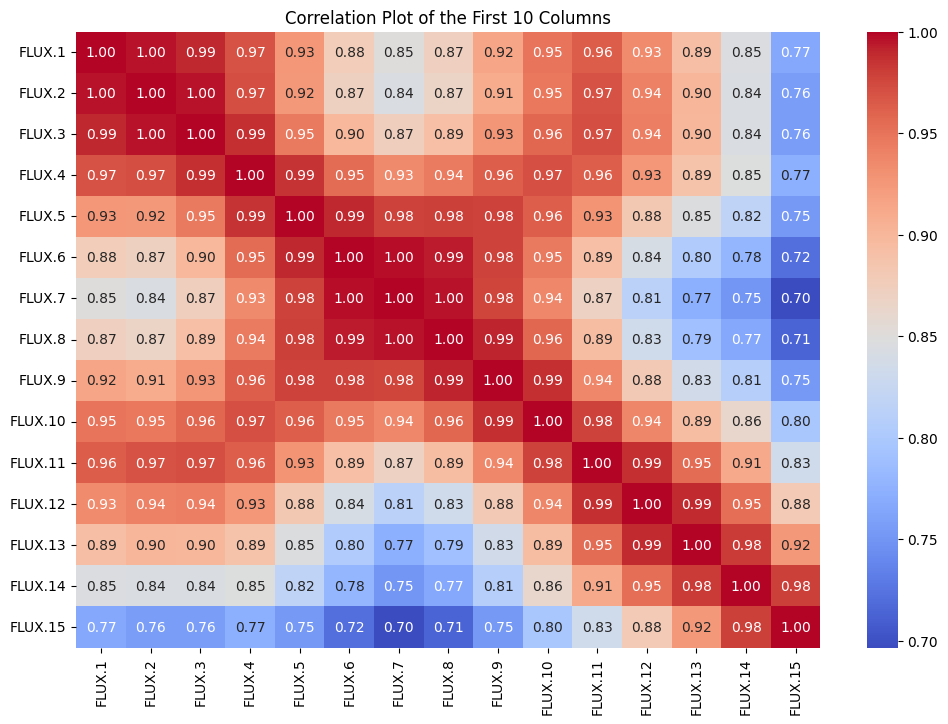

In [4]:
# Calculate the correlation matrix for the first 10 columns
correlation_matrix = df_train.iloc[:, 1:16].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Set the title and display the plot
plt.title('Correlation Plot of the First 10 Columns')
plt.show()

### We need to reduce the dimensionality and create a new correlation analysis

In [5]:
X_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:, 0]

X_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [6]:
X_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0]

In [7]:
y_test.value_counts()

LABEL
1    565
2      5
Name: count, dtype: int64

#### SMOTE
SMOTE is used to create synthetic samples for the minority class (which is likely to be the 
less frequent class in your training data) to balance the class distribution. 
After running this code, X_train_resampled and y_train_resampled will contain the resampled 
training data with balanced class distribution.

In [8]:
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)

#### Machine learning variables
Below we set some machine learning variables to control some aspects of the algorithms we will be processing.

In [9]:
m_state = 0
n_neighbors = 3
n_classes = len(np.unique(y_train))
dim = len(X_train["FLUX.1"])
n_components = 2

#### PCA Dimensionality
I have chosen to use the following three Principle Component Analysis methods in this project.

The n_components parameter sets the number of components (or dimensions) for the reduced feature space.
The StandardScaler() is used as the first step in the pipeline to standardize the features by removing the mean and scaling to unit variance,

Incremental PCA (Principal Component Analysis) is a variant of PCA designed to handle very large datasets that may not fit into memory all at once. It processes the data in mini-batches, making it suitable for online and incremental learning.

Sparse PCA (Principal Component Analysis) is a variant of PCA that introduces sparsity into the principal components. This means that the principal components will be linear combinations of a small number of input variables, making them easier to interpret. 

In [10]:
# PCA
random_state = 0
n_neighbors = 3
n_classes = len(np.unique(y_train))
dim = len(X_train["FLUX.1"])
n_components = 2

pca = make_pipeline(
    StandardScaler(),  # distance based algorithem require scaling
    PCA(n_components=n_components)
)

ipca = make_pipeline(
    StandardScaler(),  # distance based algorithem require scaling
    IncrementalPCA(n_components=n_components)
)

spca = make_pipeline(
    StandardScaler(),  # distance based algorithem require scaling
    SparsePCA(n_components=n_components)
)

In [11]:
dim_red = {
    'pca': pca,
    'ipca': ipca,
    'spca': spca,
}

In [12]:
# Initalise a variable to store the scores
method_scores = []

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [14]:
# Initialize models
knn_model = KNeighborsClassifier(n_neighbors=3)
svm_model = SVC(random_state=0)

In [15]:
# Iterate through each dimensionality reduction method
# Variable to store the transformed data
transformed_data = {}

for method, transformer in dim_red.items():
    # Fit the PCA transformation to the training data and transform both the training and test data
    X_train_transformed = transformer.fit_transform(X_train)
    X_test_transformed = transformer.transform(X_test)

    # Save the transformed data
    transformed_data[method] = {
        'X_train_transformed': X_train_transformed,
        'X_test_transformed': X_test_transformed
    }
        
    # Fit a KNN model
    knn_model.fit(X_train_transformed, y_train)
    knn_score = knn_model.score(X_test_transformed, y_test)
    
    # Fit an SVM model
    svm_model.fit(X_train_transformed, y_train)
    svm_score = svm_model.score(X_test_transformed, y_test)
    
    # Store the scores
    method_scores.append({
        'method': method,
        'knn_score': knn_score,
        'svm_score': svm_score
    })

In [16]:
method_scores

[{'method': 'pca',
  'knn_score': 0.743859649122807,
  'svm_score': 0.987719298245614},
 {'method': 'ipca',
  'knn_score': 0.743859649122807,
  'svm_score': 0.987719298245614},
 {'method': 'spca',
  'knn_score': 0.7649122807017544,
  'svm_score': 0.987719298245614}]

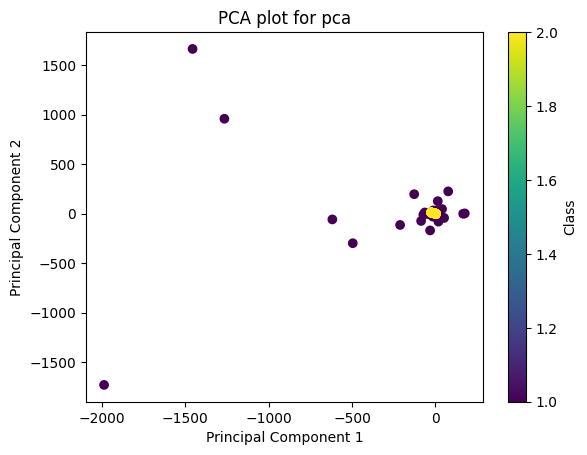

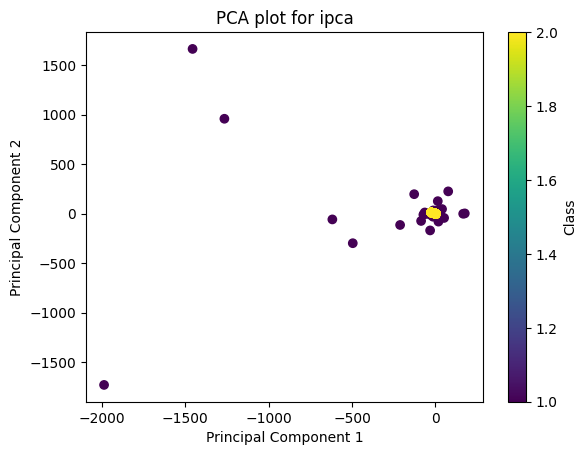

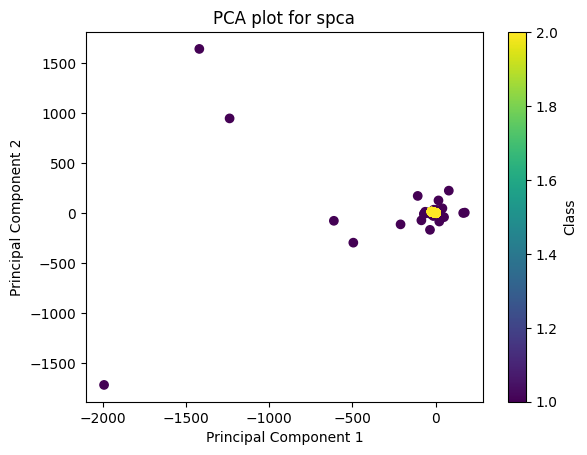

In [17]:
# Iterate through each dimensionality reduction method
for method, transformer in dim_red.items():
    # Fit the PCA transformation to the training data and transform both the training and test data
    X_transformed = transformer.fit_transform(X_train)
    
    # Create a scatter plot of the transformed data
    plt.figure()
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train, cmap='viridis')
    plt.title(f'PCA plot for {method}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Class')
    plt.show()


#### More Measures

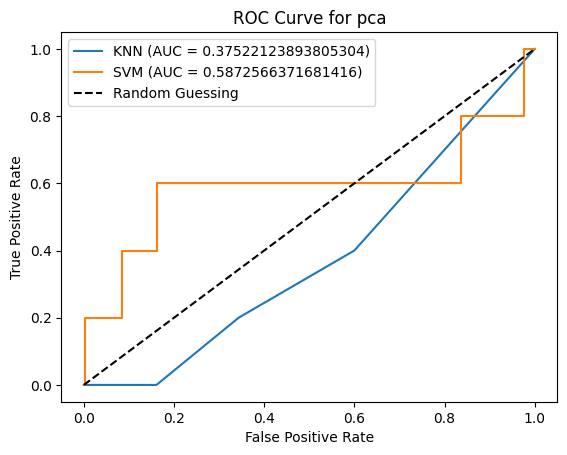

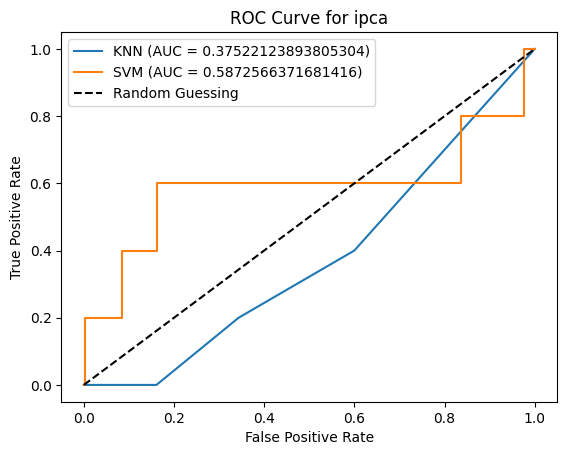

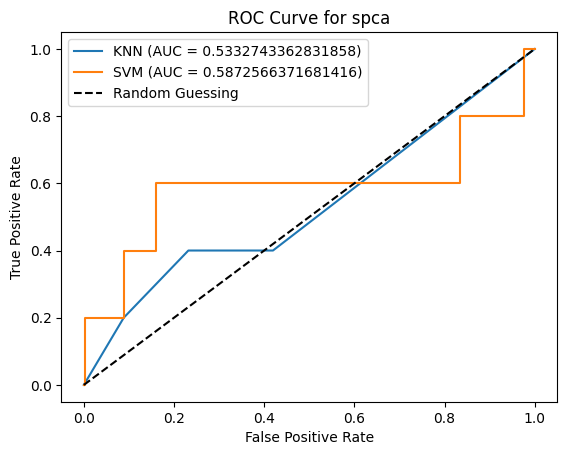

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
# Iterate through each dimensionality reduction method
for method, data in transformed_data.items():
    X_test_transformed = data['X_test_transformed']
    
    # Get the model predictions without re-fitting the models
    knn_probs = knn_model.predict_proba(X_test_transformed)[:, 1]
    svm_probs = svm_model.decision_function(X_test_transformed)
    
    # Calculate ROC curve and AUC for KNN
    knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs, pos_label=2)
    knn_auc = roc_auc_score(y_test, knn_probs)

    # Calculate ROC curve and AUC for SVM
    svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs, pos_label=2)
    svm_auc = roc_auc_score(y_test, svm_probs)

    # Plot the ROC curve
    plt.figure()
    plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc})')
    plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {method}')
    plt.legend()
    plt.show()

### Using SPCA we will now tune SVM

The parameter tuning I would like to do I cannot run efficiently on my current work laptop, therefore I have limited the tuning to be simplistic, this will give the overall idea of the next steps.

Desired:

param_grid = {
    'C': np.logspace(-5, 5, 11, base=2),
    'gamma': np.logspace(-5, 5, 11, base=2),
    'kernel': ['rbf','poly', 'linear']
}


In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
X_train_spca = transformed_data['spca']['X_train_transformed']
X_test_spca = transformed_data['spca']['X_test_transformed']

In [ ]:
# Define the parameter grid for the SVM model
param_grid = {
    'C': [0.1,1,10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Initialize the SVM model
svm_model = SVC(probability=True)

# Perform grid search with cross-validation
svm_grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# Fit the grid search to find the best parameters using the transformed SPCA data
svm_grid_search.fit(X_train_spca, y_train)

In [ ]:
# Get the best parameters
best_params = svm_grid_search.best_params_

# Train the SVM model with the best parameters
best_svm_model = SVC(probability=True, C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])
best_svm_model.fit(X_train_spca, y_train)

# Evaluate the model
svm_score = best_svm_model.score(X_test_spca, y_test)

# Print the best parameters and the model score
print("Best Parameters:", best_params)
print("SVM Model Score:", svm_score)

# Conclusion
Overall, SVM was a better prediction of determining if there could be existing exoplanets orbiting the star in the test data set. The dimensionality reduction of the data using three different PCA methods showed that out of the three spca was the preferred method in this case. Although, there was not much difference between these PCA methods.

Looking at the ROC curves, there looks to be a possible improvement of these models by fine tuning the hyperparameters for SVM, however, I have not quite been able to make this run on my work laptop, so there would need to be more work to improve them further. 

In the future, I would like to do more pca methods and look at implementing fine-tuning for kNN and SVM, as well as utilising other methods to correctly classify the training data. 

This project has helped me identify a potential method of dimensionality reduction on large data sets by utilising different PCA methods. It has also shown me, through research, how to utilise SMOTE when the number of data points is low, to create synthetic samples for the minority class